<a href="https://colab.research.google.com/github/Sanghita-C/mle-python-stack/blob/main/Linear_Regression_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Linear Regression from Scratch - what is the math?
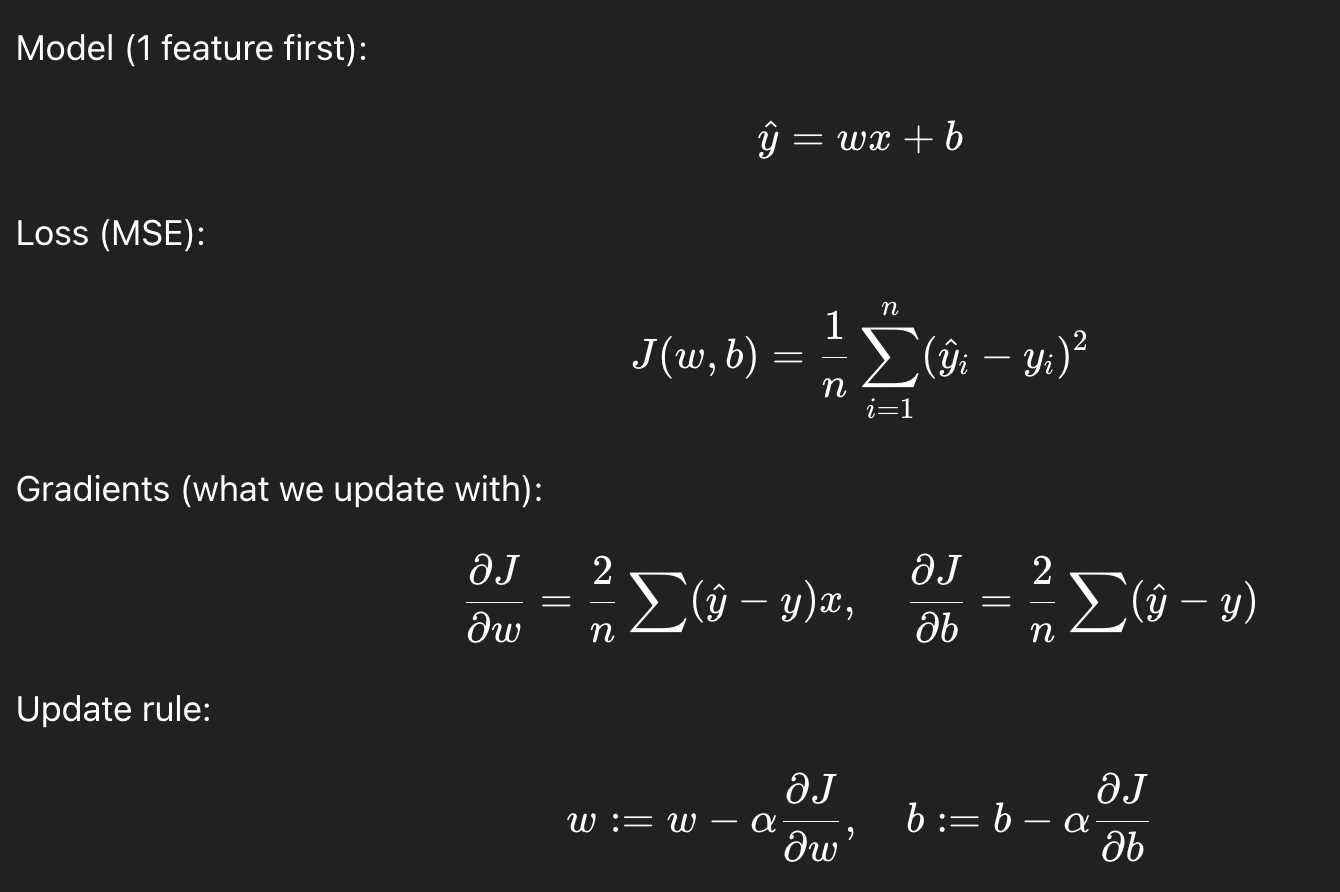

In [1]:
import numpy as np

In [2]:
#Utility Functions
def mse_and_grad(X,y,w,b):
  """
  X: (n,d)
  y: (n,)
  w: (d,)
  b: scalar
  """
  y_pred = X@w +b
  error = y_pred - y
  loss = np.mean(error**2)
  n = X.shape[0]

  dw = (2/n)*(X.T @ error)
  db = (2/n)*np.sum(error)

  return loss,dw,db


def gradient_descent(X,y,w_init,b,lr,n_iters,verbose=False):
  w = w_init.copy()
  b = float(b)

  for i in range(n_iters):
    loss,dw,db = mse_and_grad(X,y,w,b)
    w -= lr*dw
    b -= lr*db

    if verbose and (i % max(1, n_iters // 10) == 0):
            print(f"iter={i:5d} loss={loss:.6f}")

  return w,b

def mse(y_true, y_pred):
  y_true = np.asarray(y_true)
  y_pred = np.asarray(y_pred)

  y_true = y_true.reshape(-1)
  y_pred = y_pred.reshape(-1)

  return np.mean((y_true - y_pred)**2)


In [3]:
class LinearRegressionGD:
  def __init__ (self, lr =0.01, n_iters = 1000,verbose = False):
    self.lr = lr
    self.n_iters = n_iters
    self.W = None
    self.b = None
    self.verbose = verbose

  def fit(self,X,y):
    """
    X : (n,) or (n,1).  #QUESTION - Why (n, ) - can't it be (n, whatever number of features) ?
    y : (n,) or (n,1)
    """

    X = np.asarray(X)
    y = np.asarray(y)

    if X.ndim == 1:
      X = X.reshape(-1,1)
    y = y.reshape(-1)


    n,d = X.shape

    self.w = np.zeros(d)
    self.b = 0.0

    self.w , self.b = gradient_descent(X,y,self.w,self.b,self.lr,self.n_iters,verbose=self.verbose)

    return self

  def predict(self, X):
    X = np.asarray(X)
    if X.ndim == 1:
      X = X.reshape(-1,1)

    return X @self.w + self.b







In [4]:
X = np.array([1,2,3,4,5])
y = np.array([3.1,5.0,7.2,9.1,11.05])

model = LinearRegressionGD(lr=0.01, n_iters =1000, verbose=True)
model.fit(X,y)
y_pred = model.predict(X)

print("\nLearned params:")
print("w =", model.w)      # close to [2]
print("b =", model.b)

print("\nPredictions:")
print(y_pred)

iter=    0 loss=58.272500
iter=  100 loss=0.027315
iter=  200 loss=0.016040
iter=  300 loss=0.010313
iter=  400 loss=0.007404
iter=  500 loss=0.005926
iter=  600 loss=0.005175
iter=  700 loss=0.004794
iter=  800 loss=0.004600
iter=  900 loss=0.004502

Learned params:
w = [2.0046636]
b = 1.073162912721397

Predictions:
[ 3.07782652  5.08249012  7.08715372  9.09181733 11.09648093]
